In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time




In [2]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# we define a face detection function for tidyness
def detect_faces(f_cascade, colored_img, scaleFactor):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()          
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
 
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5, minSize=(30, 30));
    print('Faces found: ', len(faces))
 
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
         cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              
    return img_copy


Faces found:  10
Faces found:  10
Time taken:  0.08806395530700684


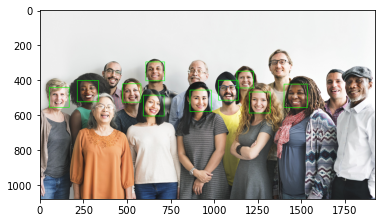

In [3]:
# load the opencv trained lbp cascade frontal face classifier
lbp_face_cascade = cv2.CascadeClassifier('./lbpcascade_frontalface.xml')

# Now we load our test image
test = cv2.imread('people.jpg') 

#perform face detection using LBP, appropriate scale factor needs to be set to get good result
faces_detected_img = detect_faces(lbp_face_cascade, test, 1.1)

plt.imshow(convertToRGB(faces_detected_img))

#note time before detection 
t1 = time.time() 
 
#call our function to detect faces 
lbp_detected_img = detect_faces(lbp_face_cascade, test, 1.1)  
 
#note time after detection 
t2 = time.time() 
#calculate time difference 
dt2 = t2 - t1 
#print the time difference
print('Time taken: ', dt2)

13  faces found
Time taken:  0.16870498657226562


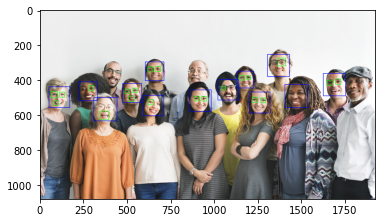

In [4]:
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')

img = cv2.imread('people.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#note time before detection 
t1 = time.time() 

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(len(faces), " faces found")
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

#note time after detection 
t2 = time.time() 
#calculate time difference 
dt2 = t2 - t1 

#print the time difference
print('Time taken: ', dt2)
plt.imshow(convertToRGB(img))

In [5]:
# vvv Compared here vvv
# the concensus shown online and by the results shown above it that LBP is much
# faster then Haar, but at the cost of a small ammount of accuracy; detecting almost 77%
# of the faces that Haar did in less than half the time. 